# Summary

Data have been aquired from flipart for pure learning and educational purposes
Selenium has been used to fetch first 25 pages of flipkart when searched with 'ear buds' and data have been segregated in tabular format for data analysis

In [3]:
import time
from selenium import webdriver
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#for spacy refer following
#https://stackabuse.com/python-for-nlp-parts-of-speech-tagging-and-named-entity-recognition/

In [2]:
# scraping the ecommerce website for educational and learning purposes
driver = webdriver.Chrome('chromedriver.exe')

earbud_dict = {'name': [],
              'prop': [],
              'rating': [],
              'num_ratings': [],
              'discounted_price' : [],
              'original_price': [],
              'num_page': []}

In [ ]:
#gathering data from webpage for top search results on first 25 pages for keyword: 'ear buds'
for num_page in range(1,1+25):
    driver.get(f'https://www.flipkart.com/search?q=ear+buds&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={num_page}')
    time.sleep(10)
    #driver.implicitly_wait(10)
    
    earbuds = driver.find_elements_by_class_name('_3liAhj')
    for num_earbud, earbud in enumerate(earbuds):
        try:
            name = earbud.find_element_by_class_name('_2cLu-l').text
        except:
            name = np.nan
        try:
            prop = earbud.find_element_by_class_name('_1rcHFq').text
        except:
            prop = np.nan
        try:
            rating = earbud.find_element_by_class_name('hGSR34').text
        except:
            rating = np.nan
        try:
            num_ratings = earbud.find_element_by_class_name('_38sUEc').text
        except:
            num_ratings = np.nan
        try:
            discounted_price = earbud.find_element_by_class_name('_1vC4OE').text
        except:
            discounted_price = np.nan
        try:
            original_price = earbud.find_element_by_class_name('_3auQ3N').text
        except:
            original_price = np.nan
        earbud_dict['name'].append(name)
        earbud_dict['prop'].append(prop)
        earbud_dict['rating'].append(rating)
        earbud_dict['num_ratings'].append(num_ratings)
        earbud_dict['discounted_price'].append(discounted_price)
        earbud_dict['original_price'].append(original_price)
        earbud_dict['num_page'].append(num_page)

In [ ]:
df = pd.DataFrame(earbud_dict)
df.head()

In [ ]:
#saving the data for offline usage so that servers are not called multiple number of times
df.to_json('ear_buds.json')

In [4]:
#Reloading data from json file
df = pd.read_json('ear_buds.json')
df.head()

,name,prop,rating,num_ratings,discounted_price,original_price,num_page
0,Infinity (JBL) Glide N120 Neckband with Metal ...,"Black, Yellow, Wireless in the ear",4.1,"(12,407)","₹1,499","₹3,999",1
1,boAt Airdopes 201 Earbuds Bluetooth Headset,"Active Black, True Wireless",4.1,"(15,791)","₹1,499","₹3,999",1
2,Infinity (JBL) Glide N120 Neckband with Metal ...,"Black, Red, Wireless in the ear",4.1,"(12,408)","₹1,499","₹3,999",1
3,Noise Shots Groove Truly Wireless Bluetooth He...,"Matte Black, True Wireless",4.1,"(5,370)","₹2,199","₹4,999",1
4,Redmi Earbuds S Bluetooth Headset,"Black, True Wireless",3.9,"(1,873)","₹1,599","₹2,399",1


In [5]:
#number of rows
print('num of rows:', len(df), '\n')
#na values
print(df.isna().sum())

num of rows: 1000 

name                  0
prop                  0
rating              701
num_ratings         701
discounted_price      0
original_price        4
num_page              0
dtype: int64


In [6]:
#clean the data for further evaluation
def clean_ratings(x):
    if x is not None:
        x = int(str(x)[1:-1].replace(',',''))
    return x
def clean_price(x):
    if x is not None:
        x = float(str(x)[1:].replace(',',''))
    return x

df['num_ratings'] = df['num_ratings'].apply(clean_ratings).astype('Int64', errors='ignore')
df['discounted_price'] = df['discounted_price'].apply(clean_price)
df['original_price'] = df['original_price'].apply(clean_price)
df['discount_percentage'] = (df['original_price'] - df['discounted_price'])*100 / df['original_price']
df.head()

,name,prop,rating,num_ratings,discounted_price,original_price,num_page,discount_percentage
0,Infinity (JBL) Glide N120 Neckband with Metal ...,"Black, Yellow, Wireless in the ear",4.1,12407,1499.0,3999.0,1,62.515629
1,boAt Airdopes 201 Earbuds Bluetooth Headset,"Active Black, True Wireless",4.1,15791,1499.0,3999.0,1,62.515629
2,Infinity (JBL) Glide N120 Neckband with Metal ...,"Black, Red, Wireless in the ear",4.1,12408,1499.0,3999.0,1,62.515629
3,Noise Shots Groove Truly Wireless Bluetooth He...,"Matte Black, True Wireless",4.1,5370,2199.0,4999.0,1,56.011202
4,Redmi Earbuds S Bluetooth Headset,"Black, True Wireless",3.9,1873,1599.0,2399.0,1,33.347228


In [7]:
#importing plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import re
from wordcloud import WordCloud
import spacy
from plotly.offline import plot

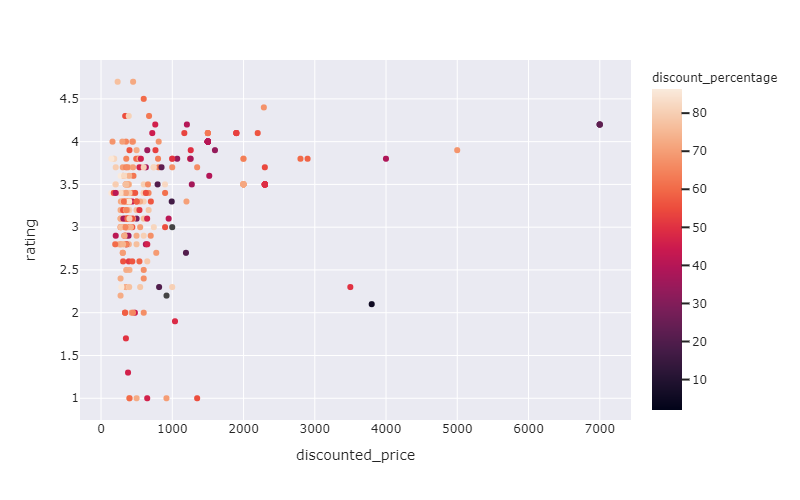

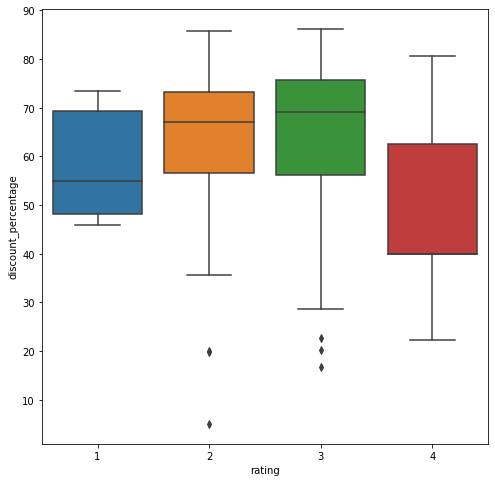

In [37]:
#evaluating if price has impact on ratings
fig = px.scatter(df, x='discounted_price', y='rating', color='discount_percentage', template='seaborn')
fig.show("png", width=800, height=500)

#Does high rating mean high discounts
df_copy = df.copy().dropna()
df_copy['rating'] = df_copy['rating'].dropna().apply(lambda x: int(x))
df_copy
plt.figure(figsize=(8, 8))
sns.boxplot(data=df_copy, x='rating', y='discount_percentage')

#conclusion: low priced earbuds (<1500) have large number of low ratings indicating poor quality
#conclusion: no impact of discount percentage seen in general
#High rating cannot confirm high discount

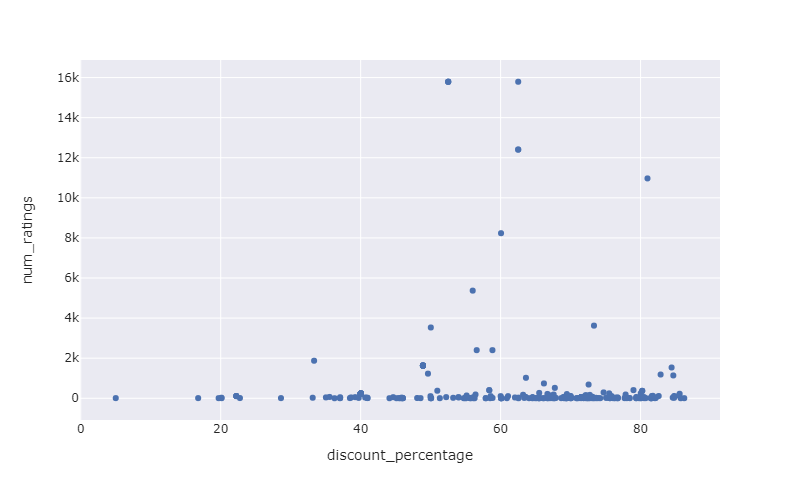

In [16]:
#evaluating if discount percentage has impact on sales
fig = px.scatter(df.dropna(), x='discount_percentage', y='num_ratings', template='seaborn')
fig.show("png", width=800, height=500)
#discount is necessary but not sufficient for good sales figure

In [11]:
def wordcloud_gen(df, column_name):
    regex = r'\w+'
    names_combined = []
    for name in df[column_name]:
        words = re.findall(regex,name)
        words = [word.lower() for word in words]
        names_combined.extend(words)
    wordcloud = WordCloud(width=800, height=400,max_font_size=50,
                  background_color="black", collocations=False).generate((" ").join(names_combined))
    plt.figure(figsize=(16,9))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

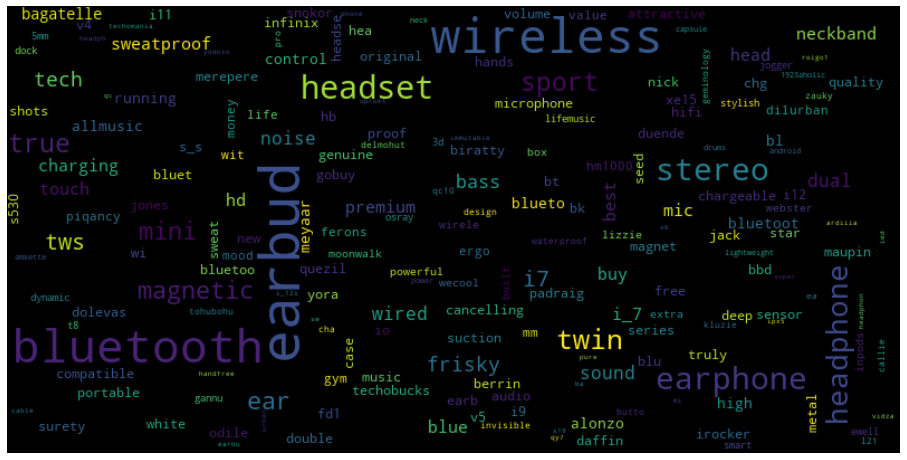

In [12]:
#generate most used words in the names of ear buds
wordcloud_gen(df, 'name')
# some of the famous words are earbud, bluetooth, wireless, earphone

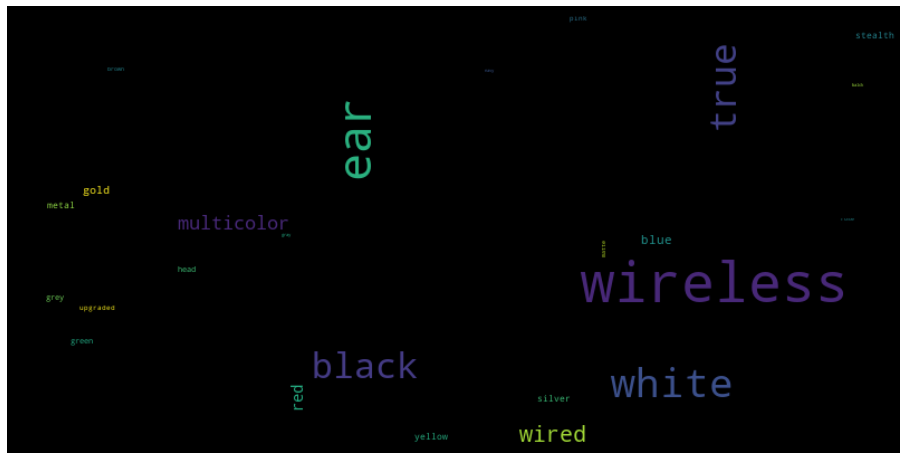

In [13]:
#generate most used words in the property of ear buds
wordcloud_gen(df, 'prop')
# some of the famous words are wireless, white, black, wired, true
#seems like there are more white and black earbuds athan any other colors
#Going for any other color , rather people produce multicolor earbuds

In [16]:
def wordcloud_gen_noun(df, column_name):
    '''only generate word cloud which are proper noun based on named entity recognition'''
    names_combined = []
    regex = r'\w+'
    for name in df[column_name]:
        words = re.findall(regex,name)
        words = [word.lower() for word in words]
        names_combined.extend(words)
    text = (" ").join(names_combined)

    sp = spacy.load(r"C:\Users\Gaurav\anaconda3\Lib\site-packages\en_core_web_sm\en_core_web_sm-2.3.1")
    sen = sp(text)
    #for word in sen[:20]:
    #    print(f'{word.text:{12}} {word.pos_:{10}} {word.tag_:{8}} {spacy.explain(word.tag_)}')
    noun = []
    for word in sen:
        if word.pos_ in ['PROPN']:
            noun.append(word.text)
    wordcloud = WordCloud(width=800, height=400,max_font_size=50,
              background_color="black", collocations=False).generate((" ").join(noun))
    plt.figure(figsize=(16,9))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

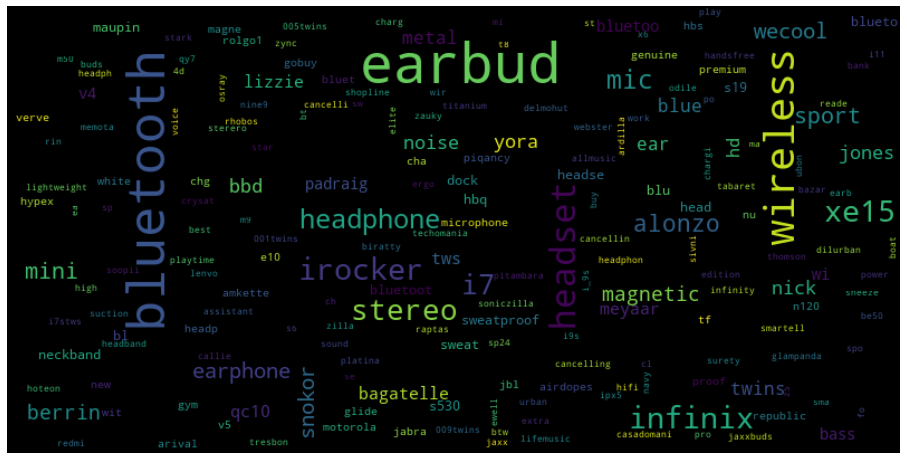

In [17]:
#what people like [only proper nouns]
filt = (df['rating']>=3)
wordcloud_gen_noun(df[filt], 'name')
#people like infinix, irocker, alonzo, etc

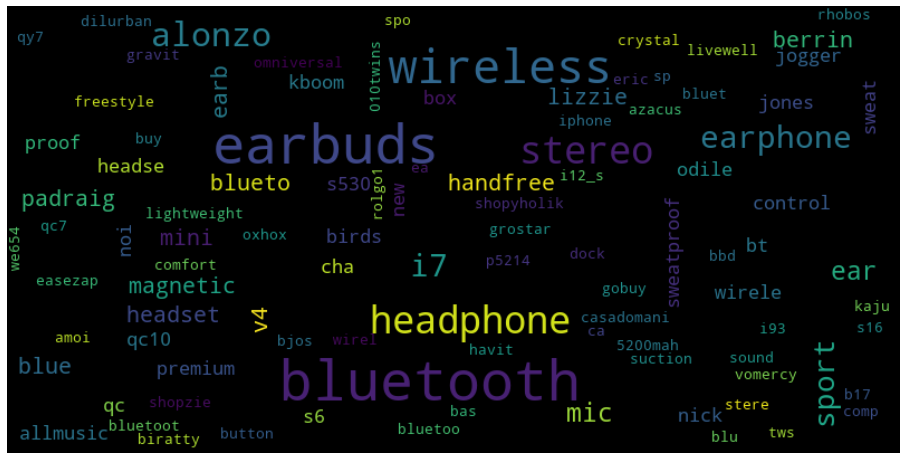

In [18]:
#what people don't like [only proper nouns]
filt = (df['rating']<3)
wordcloud_gen_noun(df[filt], 'name')
#people don't like blueto, jogger, lizzie, etc

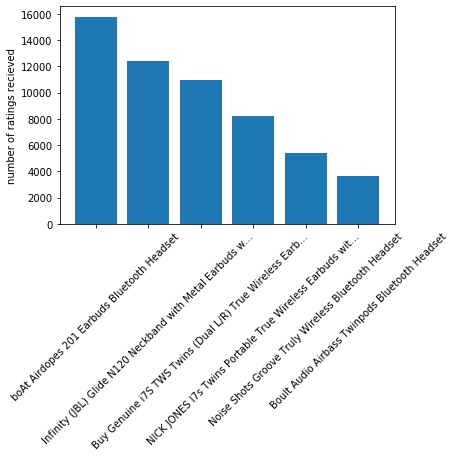

In [19]:
#Maximum sold earbuds as per maximum number of ratings recieved
max_rated = df.sort_values('num_ratings', ascending=False)[:10]
plt.bar(x=max_rated['name'], height=max_rated['num_ratings'])
plt.xticks(rotation=45)
plt.ylabel('number of ratings recieved')
plt.show()
#boAt is the leader here

<Figure size 1152x288 with 0 Axes>

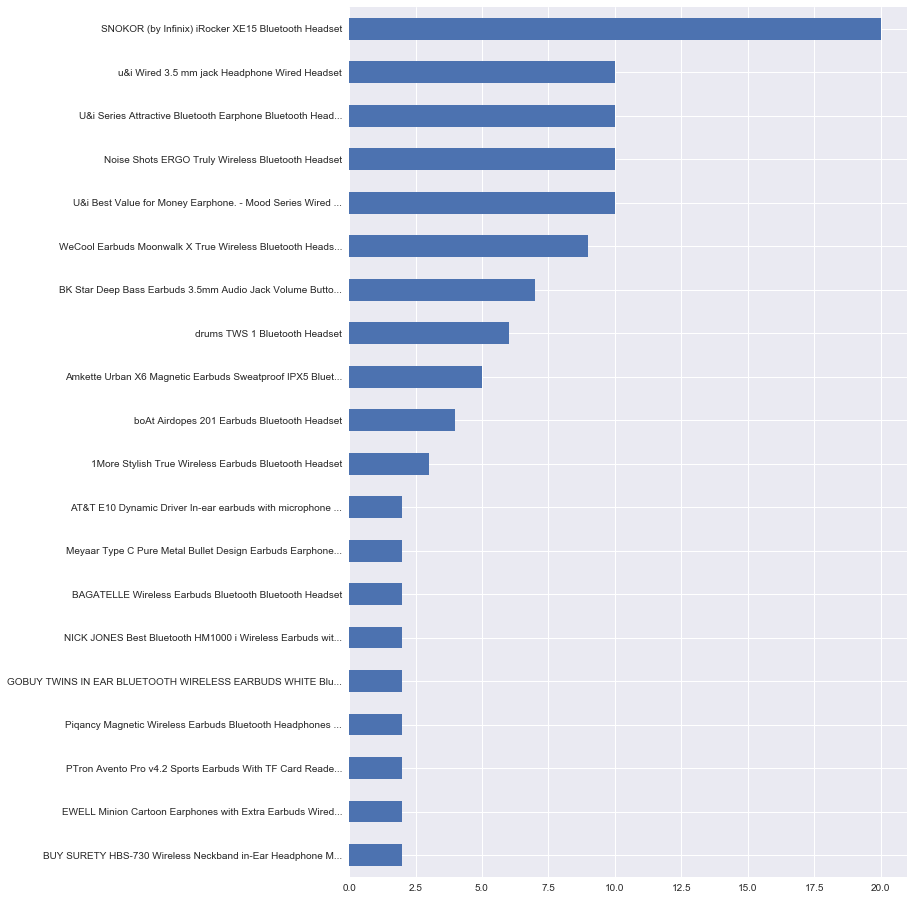

In [20]:
# Top 20 listed eabuds [Maximum variety over the website]
plt.figure(figsize=(16,4))
plt.style.use('seaborn')
plt.figure(figsize=(10,16))
df['name'].value_counts().sort_values()[-20:].plot.barh()
plt.show()
#SNOKER is the leader here

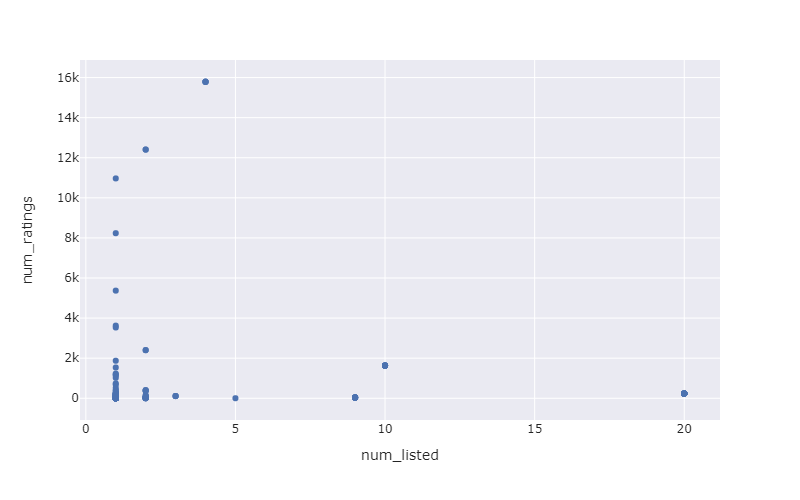

In [17]:
#Does most listed gets more buyers [by evaluating number of ratings]
num_listed = df['name'].value_counts().sort_values()
df_copy = df.copy()
df_copy['num_listed'] = df.apply(lambda x: num_listed[x['name']], axis=1)
fig = px.scatter(df_copy.dropna(), x='num_listed', y='num_ratings', template='seaborn')
fig.show("png", width=800, height=500)
#No correlation, Maximum number of times the listed doesnot gurantee maximum sales

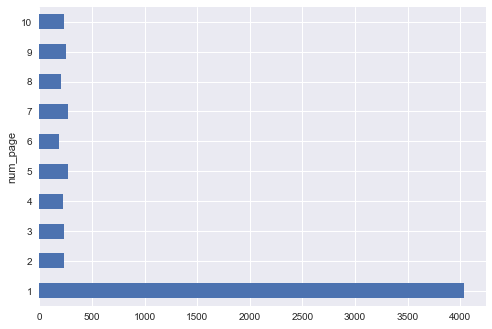

In [22]:
#Does items listed on the initial pages acquire more customers [by evaluating more number of ratings]
df.groupby('num_page').apply(lambda x: x['num_ratings'].mean())[:10].plot.barh()
#Yes it does look like page 1 has maximum rated products rather than other pages

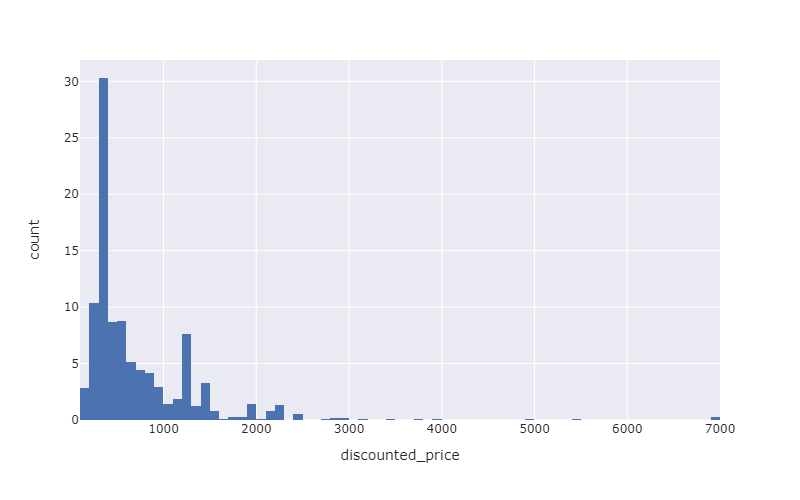

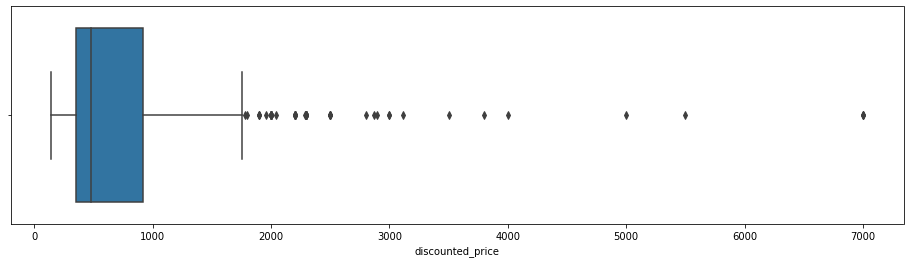

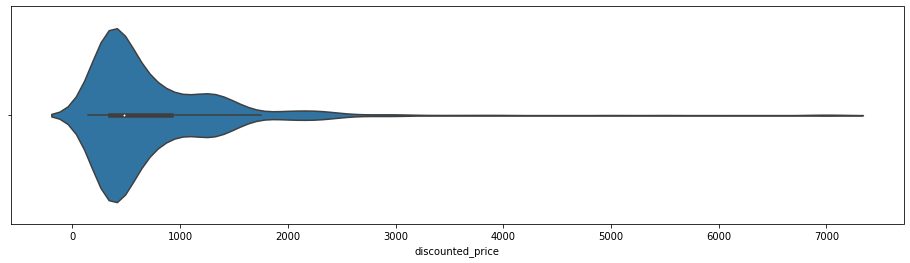

In [19]:
#usual prices of earbuds
fig = px.histogram(df, x='discounted_price', template='seaborn', histnorm='percent')
fig.show("png", width=800, height=500)
plt.figure(figsize=(16,4))
sns.boxplot(df['discounted_price'])
plt.figure(figsize=(16,4))
sns.violinplot(df['discounted_price'])

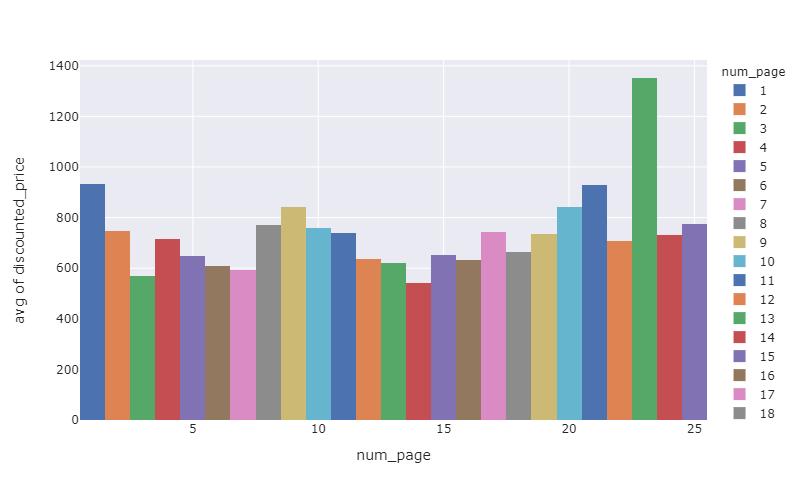

In [20]:
#average prive of earbuds w.r.t. different pages of website
fig = px.histogram(df, x='num_page', y='discounted_price', template='seaborn', histfunc='avg', color='num_page')
fig.show("png", width=800, height=500)
#No general trend, prices are evenly distributed across pages

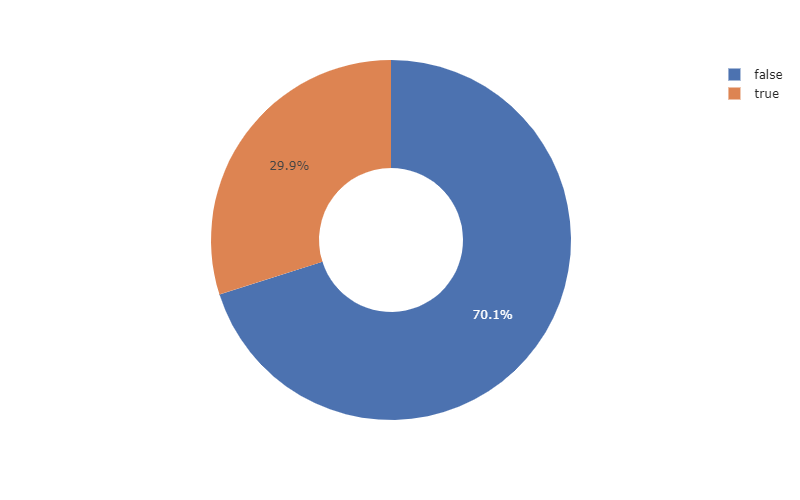

In [21]:
#percentage of products not getting rated
fig = px.pie(df['rating'].notna(), names='rating', template='seaborn')
fig.update_traces(hole=0.4)
fig.show("png", width=800, height=500)
#70% of products are not getting ratings

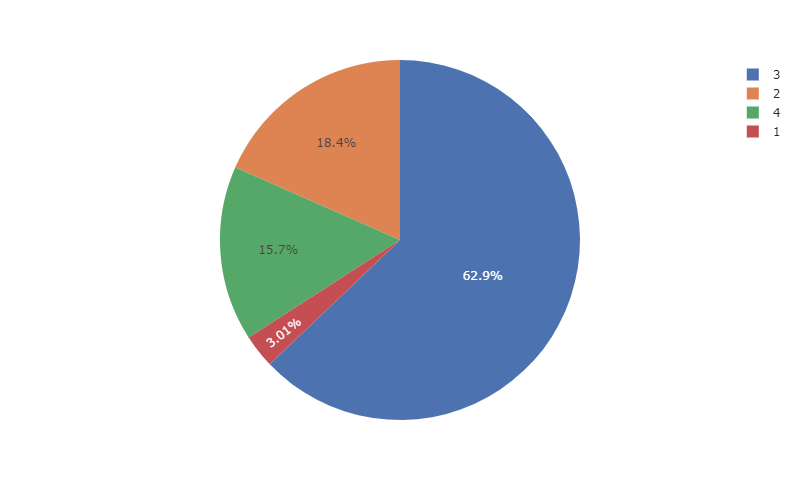

In [22]:
#Rating disctribution
fig = px.pie(df['rating'].dropna().apply(lambda x: int(x)), names='rating', template='seaborn')
fig.show("png", width=800, height=500)
#In general people are diplomatic and gives 3 majorly ~60% of times